# Notations
<ul><li>n -> number of features</li>
<li>m -> number of training examples</li>
<li>X -> input data matrix of a shape(m x n)</li>
<li>y -> target value(<b>can be a real number</b>)</li>
<li>X(i),y(i) -> ith training example</li>
<li>x(i,j) -> jth feature of training example </li>
<li>theta ->weigts(parameters) of shape ((n+1) x 1)</li>
<li>y_hat -> hypothesis(<b>outputs of a real number</b>)</li></ul>


## hypothesis function
<ul><li>The hypothesis function for linear regression with multiple features is \(H_{0}:\beta _{1}=\beta _{2}=\cdots =\beta _{p}=0\). This hypothesis states that there is no useful linear relationship between the dependent variable (\(y\)) and any of the predictor variables (\(x_{1},x_{2},\dots ,x_{p}\)</li>
<br>
<li><h3>Explanation :</h3></li>
<li>In multiple linear regression (MLR), there are multiple independent variables (\(x_{1},x_{2},\dots ,x_{p}\)) and one dependent variable (\(y\)). </li>
<li>The hypothesis function for MLR tests whether the slope coefficients (\(\beta _{1},\beta _{2},\dots ,\beta _{p}\)) are all equal to zero. </li>
<li>If at least one of the slope coefficients is not zero, then the model is considered useful. </li>
<li>A joint test is a better way to test the hypothesis than testing each slope coefficient separately. </li>
<br>
<li><h3>Example :</h3></li>
<li>For example, you can use MLR to estimate how crop growth is affected by rainfall, temperature, and fertilizer.</li></ul>


In [3]:
import numpy as np
from sklearn.datasets import make_regression # to generate a dumy data
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
# step 1 generate the data
X,y =make_regression(n_samples=500,n_features=10,n_informative=5,noise=25.8,random_state=0)
print(X.shape,y.shape)
n_features=X.shape[1]

(500, 10) (500,)


In [160]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [162]:
# step -2 --normalize the data
# X.mean(axis=0).shape
def normalise(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)
    return (X-u)/std

In [164]:
X=normalise(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [166]:
X.mean(axis=0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [168]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

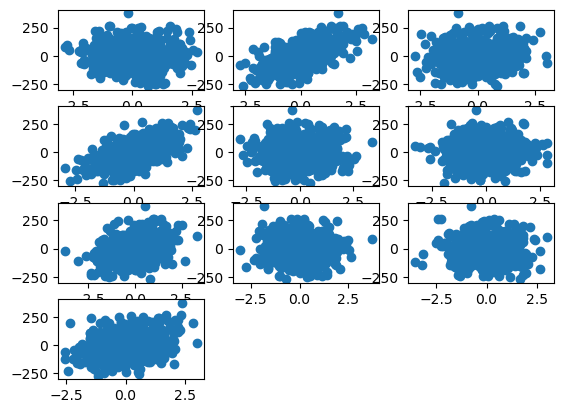

In [170]:
#Visualize y as a function of each feature
for f in range(0,10):
    plt.subplot(4,3,f+1)  # (3,3 )is a matrix of 3 rows and 3 column
    plt.scatter(X[:,f],y)

plt.show()

In [214]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_regression(n_samples=500, n_features=10, noise=25.8, random_state=0)

# Correct splitting
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.3, random_state=42)

# Debugging outputs
print("XT shape:", XT.shape)  # Should be (350, 10)
print("yT shape:", yT.shape)  # Should be (350,)
print("X_test shape:", Xt.shape)  # Should be (150, 10)
print("y_test shape:", yt.shape)  # Should be (150,)


XT shape: (350, 10)
yT shape: (350,)
X_test shape: (150, 10)
y_test shape: (150,)


<img src="./gradient desent.png">

In [240]:
# Step 5 -- modelling/ Linear Regression with multiple features
import numpy as np

def preprocess(X):
    m = X.shape[0]  # number of samples
    ones = np.ones((m, 1))  # column of ones with same number of rows as X
    X = np.hstack((ones, X))  # add the ones column to the left of the feature matrix
    return X



In [242]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis function (prediction)
def hypothesis(X, theta):
    return np.dot(X, theta)  # Matrix multiplication for prediction

# Loss function (mean squared error)
def loss(X, y, theta):
    yp = hypothesis(X, theta)  # Prediction
    error = np.mean((y - yp) ** 2)  # Mean squared error
    return error

# Gradient function (for gradient descent)
def gradient(X, y, theta):
    yp = hypothesis(X, theta)  # Prediction
    grad = np.dot(X.T, (yp - y))  # Compute the gradient
    m = X.shape[0]  # Number of training examples
    return grad / m  # Return the average gradient

# Training function with gradient descent
def train(X, y, learning_rate=0.1, max_iters=100):
    n = X.shape[1]  # Number of features
    theta = np.zeros(n)  # Initialize theta as zeros
    error_list = []  # To store the loss values
    
    for i in range(max_iters):
        e = loss(X, y, theta)  # Compute the current loss
        error_list.append(e)  # Append the loss to error list
        grad = gradient(X, y, theta)  # Compute the gradient
        theta = theta - learning_rate * grad  # Update theta

    # Plotting the error over iterations
    plt.plot(error_list)
    plt.title('Error over iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (MSE)')
    plt.show()

    return theta  # Return the learned parameters (theta)



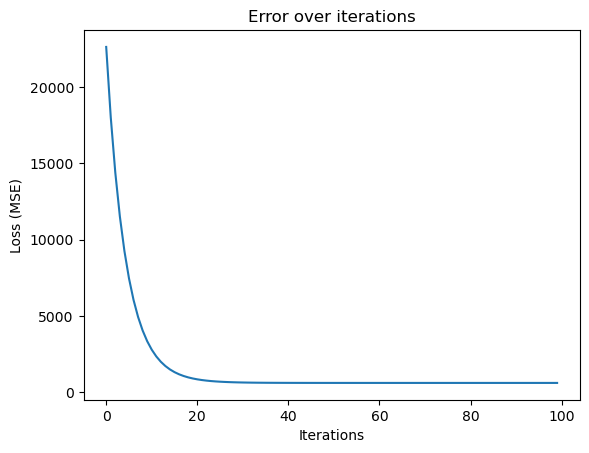

[28.74448465 59.21536838 10.8948344  67.20972701 55.93011846 52.2876839
 40.92674109 54.46134449  1.63411616 25.16674931]


In [244]:
# pd.DataFrame(X).head()

theta = train(XT,yT)
print(theta)

In [246]:
# step 6 -- Evalation
print(theta.shape)

(10,)


In [225]:
gradient(XT,yT,theta).shape

(10,)

In [227]:
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)
    return 1-num/denom

In [229]:
yp = hypothesis(Xt,theta)

In [238]:
r2Score(yt,yp)

0.9566154608621071